In [23]:
%pip install scikit-image

     --------------------------------------- 12.0/12.0 MB 19.3 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 24.1 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 23.8 MB/s eta 0:00:00
     ------------------------------------- 210.3/210.3 kB 12.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import pandas as pd
import tensorflow as tf
import keras

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

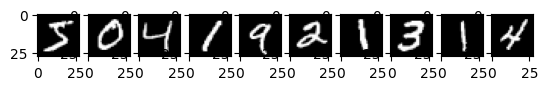

In [15]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_images[i], cmap='gray')

In [16]:
train_images = train_images.reshape((60000,28,28,1))[:50]
test_images = test_images.reshape((10000,28,28,1))[:50]
train_labels = train_labels[:50]
test_labels = test_labels[:50]

In [18]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((50, 28, 28, 1), (50, 28, 28, 1), (50,), (50,))

In [25]:
train_images = resize(train_images, (50,10,10,1))
test_images = resize(test_images, (50,10,10,1))

In [26]:
train_images.shape, test_images.shape

((50, 10, 10, 1), (50, 10, 10, 1))

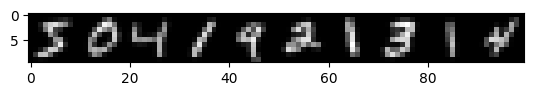

In [31]:
plt.imshow(np.hstack(train_images[:10]), cmap='gray')

In [32]:
np.shape(train_images[:10])

(10, 10, 10, 1)

In [33]:
np.shape(np.hstack(train_images[:10]))

(10, 100, 1)

![](2022-10-18-15-55-43.png)

In [34]:
np.shape(train_images[0])

(10, 10, 1)

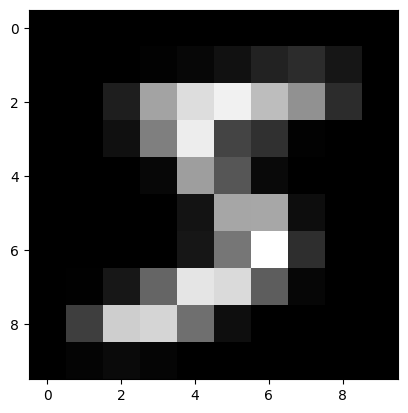

In [35]:
plt.imshow(train_images[0], cmap='gray')

In [37]:
train_images[0].shape

(10, 10, 1)

In [38]:
np.vstack(train_images[0]).shape

(100, 1)

In [39]:
np.vstack(train_images[0]).reshape(10,10).shape

(10, 10)

In [41]:
train_images[0]

array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [3.77981275e-09],
        [5.70398233e-07],
        [3.68141234e-06],
        [1.04215244e-05],
        [1.50630499e-05],
        [8.00936899e-06],
        [1.61933469e-08]],

       [[0.00000000e+00],
        [3.49396591e-07],
        [7.80717762e-04],
        [7.99927253e-03],
        [2.61918420e-02],
        [5.98190866e-02],
        [1.15517072e-01],
        [1.55306182e-01],
        [7.67984353e-02],
        [1.51980125e-04]],

       [[0.00000000e+00],
        [9.85766049e-05],
        [1.03630745e-01],
        [5.54532797e-01],
        [7.50038354e-01],
        [8.15208884e-01],
        [6.41329983e-01],
        [4.91693800e-01],
        [1.53925431e-01],
        [2.48173160e-04]],

       [[0.00000000e+00],
        [2.61759477e-05],
        [5.65685363e-02],
        [4.30061268e-01],
        [8.04683454e-01],
        [2.33120765e-01],
        [1.62437276e-01],
        [8.34610639e-03],
      

In [42]:
np.vstack(train_images[0]).reshape(10,10)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.77981275e-09,
        5.70398233e-07, 3.68141234e-06, 1.04215244e-05, 1.50630499e-05,
        8.00936899e-06, 1.61933469e-08],
       [0.00000000e+00, 3.49396591e-07, 7.80717762e-04, 7.99927253e-03,
        2.61918420e-02, 5.98190866e-02, 1.15517072e-01, 1.55306182e-01,
        7.67984353e-02, 1.51980125e-04],
       [0.00000000e+00, 9.85766049e-05, 1.03630745e-01, 5.54532797e-01,
        7.50038354e-01, 8.15208884e-01, 6.41329983e-01, 4.91693800e-01,
        1.53925431e-01, 2.48173160e-04],
       [0.00000000e+00, 2.61759477e-05, 5.65685363e-02, 4.30061268e-01,
        8.04683454e-01, 2.33120765e-01, 1.62437276e-01, 8.34610639e-03,
        1.21855255e-03, 5.83783672e-07],
       [0.00000000e+00, 9.74859056e-09, 1.27966186e-04, 2.50277525e-02,
        5.37498240e-01, 2.90856430e-01, 3.38001353e-02, 3.05127503e-04,
        1.19027390e-08, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.26686162e-09, 2.61027903e-04,
   

In [44]:
pd.DataFrame(np.vstack(train_images[0]).reshape(10,10))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000e+00,0.000000e+00,3.779813e-09,5.703982e-07,0.000004,1.042152e-05,0.000015,8.009369e-06,1.619335e-08
1,0.000000,3.493966e-07,7.807178e-04,7.999273e-03,2.619184e-02,0.059819,1.155171e-01,0.155306,7.679844e-02,1.519801e-04
2,0.000000,9.857660e-05,1.036307e-01,5.545328e-01,7.500384e-01,0.815209,6.413300e-01,0.491694,1.539254e-01,2.481732e-04
3,0.000000,2.617595e-05,5.656854e-02,4.300613e-01,8.046835e-01,0.233121,1.624373e-01,0.008346,1.218553e-03,5.837837e-07
4,0.000000,9.748591e-09,1.279662e-04,2.502775e-02,5.374982e-01,0.290856,3.380014e-02,0.000305,1.190274e-08,0.000000e+00
5,0.000000,0.000000e+00,6.266862e-09,2.610279e-04,6.696573e-02,0.564458,5.666593e-01,0.047100,1.411354e-05,0.000000e+00
6,0.000000,4.497760e-08,3.063738e-05,3.220381e-03,7.633813e-02,0.401042,8.656932e-01,0.157746,1.073702e-04,0.000000e+00
7,0.000008,5.200728e-03,7.889449e-02,3.434775e-01,7.748787e-01,0.739755,3.174749e-01,0.021589,2.289392e-06,0.000000e+00
8,0.000387,2.102920e-01,6.982965e-01,7.215174e-01,3.777502e-01,0.048582,1.853358e-03,0.000010,1.813034e-10,0.000000e+00
9,0.000029,1.430609e-02,3.384249e-02,1.997844e-02,1.852532e-03,0.000012,1.298005e-08,0.000000,0.000000e+00,0.000000e+00


In [45]:
train_images = (train_images*10).astype('int32')
test_images = (test_images*10).astype('int32')
pd.DataFrame(np.vstack(train_images[0]).reshape(10,10))

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0
2,0,0,1,5,7,8,6,4,1,0
3,0,0,0,4,8,2,1,0,0,0
4,0,0,0,0,5,2,0,0,0,0
5,0,0,0,0,0,5,5,0,0,0
6,0,0,0,0,0,4,8,1,0,0
7,0,0,0,3,7,7,3,0,0,0
8,0,2,6,7,3,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


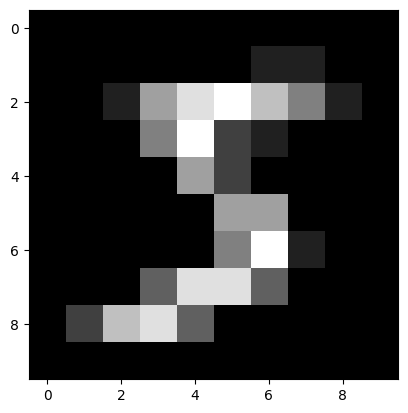

In [46]:
plt.imshow(train_images[0], cmap='gray')

In [50]:
# Conv2D : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# MaxPooling2D : https://www.tensorflow.org/api_docs/python/tf/compat/v1/layers/MaxPooling2D
# MaxPooling : 정해진 크기 안에서 가장 큰 값만 뽑아낸다.
# Flatten() 이유 : https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras
tf.random.set_seed(123)

model = models.Sequential()
model.add(layers.Conv2D(1, (3,3), activation='relu', input_shape=(10,10,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(2, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 1)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
 dense_5 (Dense)             (None, 10)                30        
                                                      

![](2022-10-18-16-10-21.png)

![](2022-10-18-16-30-47.png)

In [51]:
# Flatten 안쓸경우 summary 확인
tf.random.set_seed(123)

model = models.Sequential()
model.add(layers.Conv2D(1, (3,3), activation='relu', input_shape=(10,10,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(2, (3,3), activation='relu'))
# model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 8, 8, 1)           10        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 1)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 2)           20        
                                                                 
 dense_6 (Dense)             (None, 2, 2, 2)           6         
                                                                 
 dense_7 (Dense)             (None, 2, 2, 10)          30        
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
__________________________________________________________

In [54]:
test_labels

5

In [58]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

# 원-핫 인코딩
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                               

KeyboardInterrupt: 

313/313 [==============================] - 3s 11ms/step


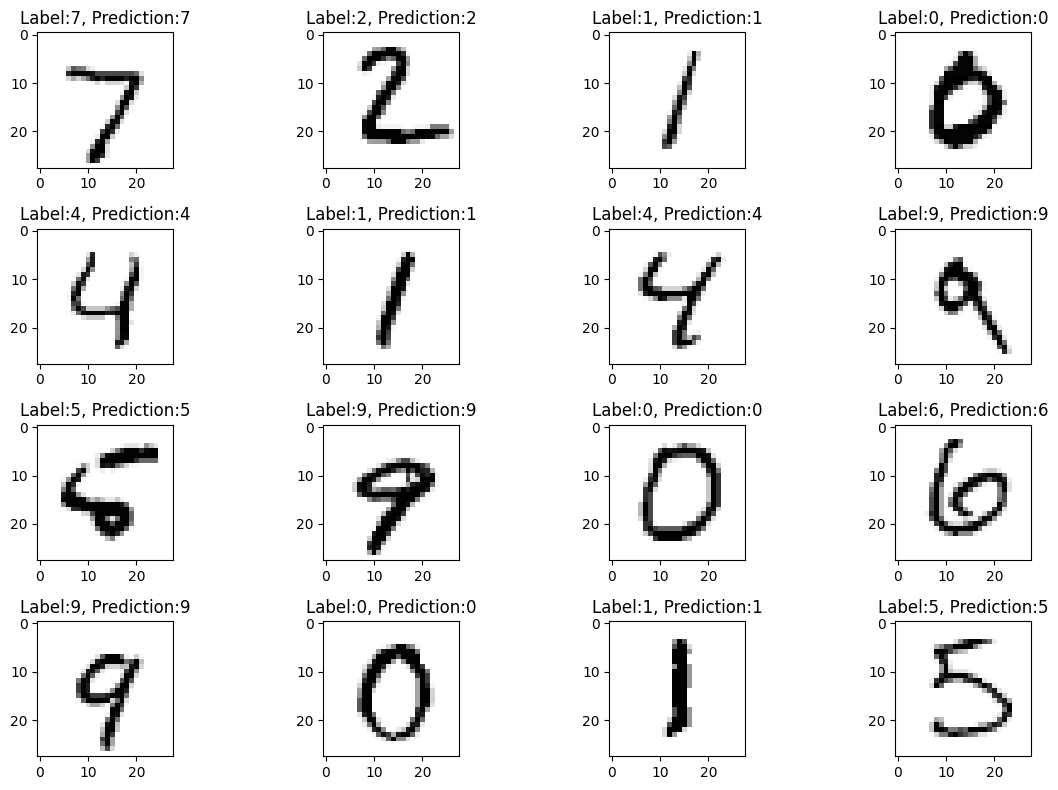

In [59]:
import random
import matplotlib.pyplot as plt

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

count = 0

plt.figure(figsize=(12,8))
for n in range(16):
    count += 1
    plt.subplot(4, 4, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

(9, 28, 28, 1)
1/1 [==============================] - 0s 24ms/step
-------------


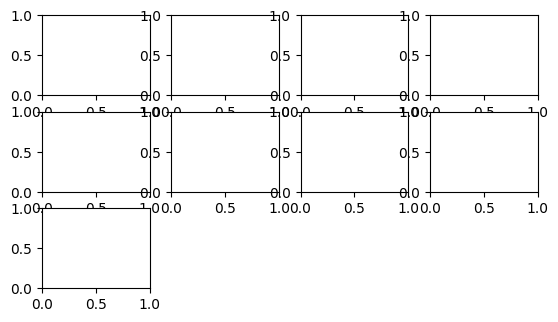

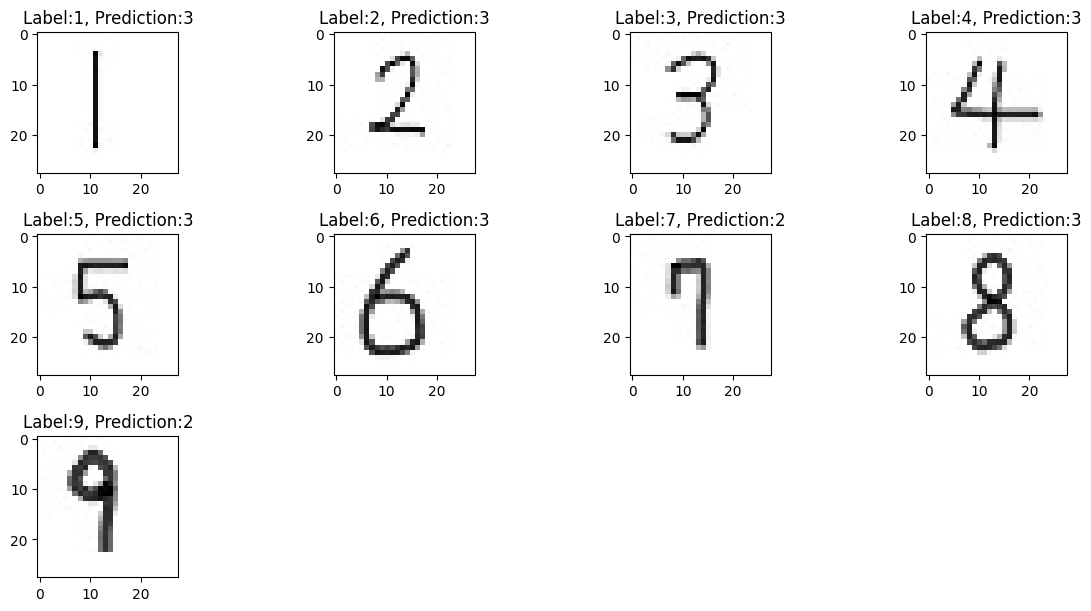

In [91]:
from PIL import Image

my_test = []
for i in range(1,10):
    plt.subplot(4, 4, i)
    img = Image.open(f'./num/{i}.jpg')
    img = img.convert('L')
    img_np = np.array(img)
    img_np = img_np.reshape((28,28,1))
    # print(img_np.shape) # RGB랑 흑백이 안맞는거 같네 채널이
    img_np = img_np.astype('float32') / 255
    # print(img_np)
    my_test.append(img_np)

my_test = np.array(my_test)
print(my_test.shape)
predicted_result = model.predict(my_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(12,8))
for i in range(1,10):
    plt.subplot(4, 4, i)
    plt.imshow(my_test[i-1], cmap='gray')
    tmp = "Label:" + str(i) + ", Prediction:" + str(predicted_labels[i-1])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [69]:
x_test.shape

(10000, 28, 28, 1)